# Introduction  
In this notebook, we study an aviation events dataset available on [kaggle]('https://www.kaggle.com/khsamaha/aviation-accident-database-synopses').  
Safety is one of the most important topics in aviation industry. It is regulated, at the national level and international level through [ICAO](https://www.icao.int/).  
Aircraft are complex equipments, affected by multiple environmental and human factors. Every breach in the safety practises can have catastrophic consequences, and can cause fatal injuries.  
Using this dataset, we will build an intuition about aviation events. We will highlight some of the factors and consequences of these events.  

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
from tqdm.notebook import tqdm
from numpy import random
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (18, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


## 1- Downloading the dataset

In [2]:
ds_filepath = '.\data/aviation-accident-database-synopses/AviationData.csv'
states_filepath = '.\data/aviation-accident-database-synopses/USState_Codes.csv'

if not(os.path.exists(ds_filepath)):
    ds_url =  'https://www.kaggle.com/khsamaha/aviation-accident-database-synopses'
    od.download_kaggle_dataset(ds_url,'.\data')
aviation_ds = pd.read_csv(ds_filepath, encoding='ISO-8859-1')
states_ds = pd.read_csv(states_filepath, encoding='ISO-8859-1')


We downloaded two csv files. The `states_ds` dataset contains a list of US states and theit two-letters abbreviations. The main dataset is `aviation_ds`. Let's explore it !

In [3]:
print('Columns :')
print(aviation_ds.columns)
print('\n')
aviation_ds.info()

Columns :
Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'LOCATION', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-

This dataset contains more than 85k records of aviation incidents/accidents. Each event is described using multiple parameters. Let's check the first column of interest. 

In [4]:
aviation_ds['Investigation.Type'].unique()

array(['Accident', 'Incident', nan], dtype=object)

The investigations are grouped into two categories:
>**Incident** refer to an unexpected event, that causes safety concerns.  
>**Accidents** are incidents that invlove injuries or deaths.
  
    
For each event, a date is provided through `Event.date` column. Let's convert it to date/time data type :

In [6]:
aviation_ds['Event.Date'] = pd.to_datetime(aviation_ds['Event.Date'])
aviation_ds['Event.Date'].describe()

ipykernel_launcher:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.


count                   85976
unique                  14117
top       1984-06-30 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2021-02-16 00:00:00
Name: Event.Date, dtype: object

The first recorded event happened on 1948, so more than 73 years ago. Let's verify which weekdays and months are more represented in the data.

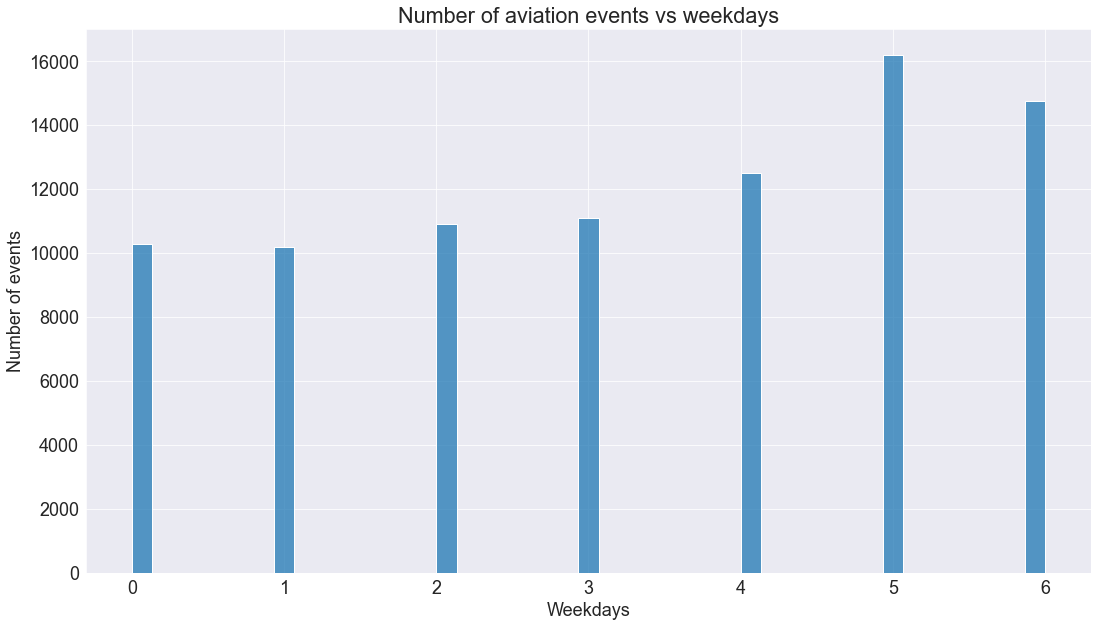

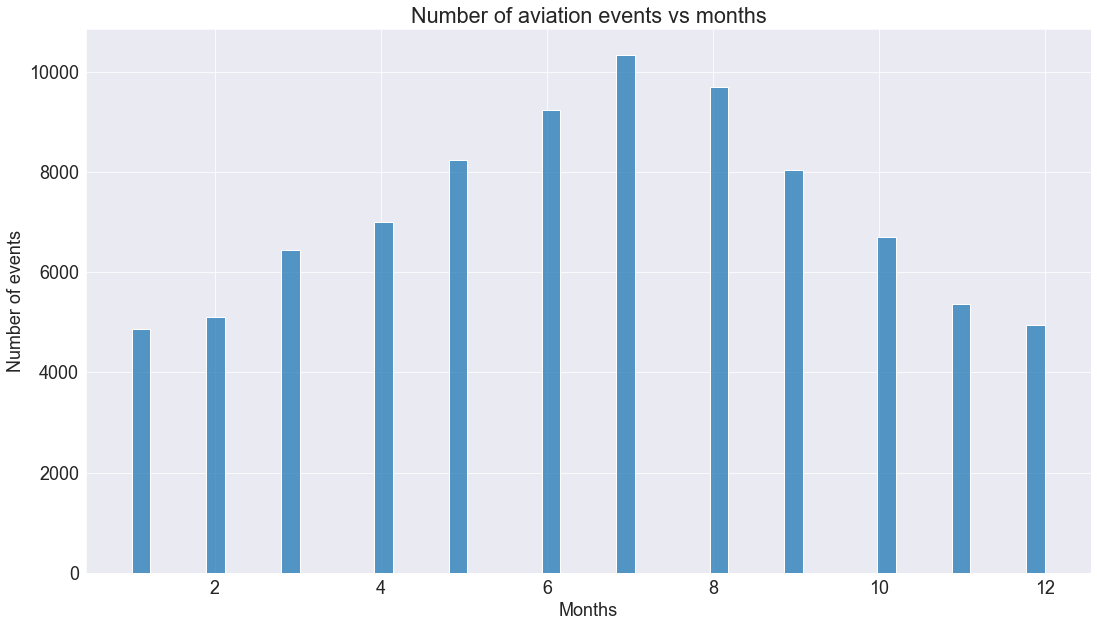

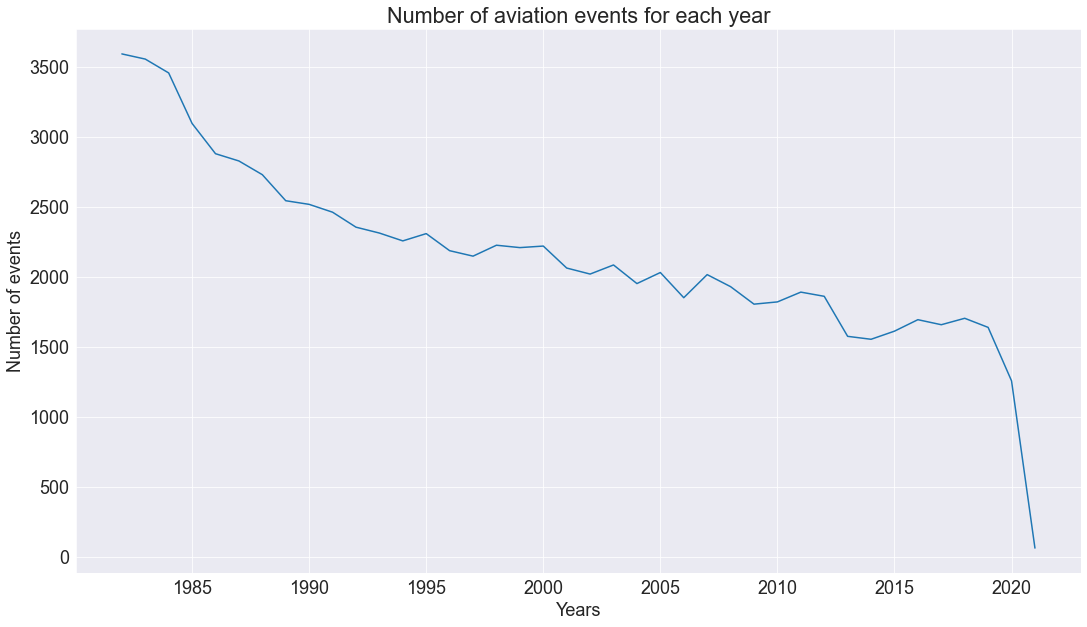

In [28]:
aviation_ds['Event.Weekday']=aviation_ds['Event.Date'].dt.weekday # 0 is monday, 6 is sunday
aviation_ds['Event.Month']=aviation_ds['Event.Date'].dt.month # 
aviation_ds['Event.Year']=aviation_ds['Event.Date'].dt.year #
fig = sns.histplot(x ='Event.Weekday', data = aviation_ds, stat='count' );
fig.set(xlabel = 'Weekdays', ylabel = 'Number of events', title = 'Number of aviation events vs weekdays')
plt.figure()
fig = sns.histplot(x ='Event.Month', data = aviation_ds, stat='count');
fig.set(xlabel = 'Months', ylabel = 'Number of events', title = 'Number of aviation events vs months')
events_per_year =  aviation_ds[aviation_ds['Event.Year']>1981].groupby('Event.Year').count()
plt.figure()
plt.plot(events_per_year.index , events_per_year['Event.Id']);
plt.xlabel('Years');
plt.ylabel('Number of events');
plt.title('Number of aviation events for each year');


The first histogram shows that events happen more often on *saturday or sunday*. This is expected due to the large number of amateur pilots flying only on weekends. We will see later the relationship between the type of aircraft and the probablity of accidents/incidents.  
The second plot shows that events are more likely to happen during summer in the northern hemisphere. This is probably due to more aviation activity in this region (north America, Europe and Asia) during summer. Another reason would be that our dataset has more entries from the USA, as we will see later.  
In the third plot, a downward trend is observed. The number of events is decreasing due to new technologies mainly in aircraft design and air traffic control services/equipment. The very low number of accident in 2020 and 2021 is probably due to the big drop in air traffic during the Covid-19 pandemic crisis.     
Let's consider the columns `LOCATION` and `Country`. First we have to fix a small detail about datatype:

In [29]:
aviation_ds.dtypes


Event.Id                          object
Investigation.Type                object
Accident.Number                   object
Event.Date                datetime64[ns]
LOCATION                          object
Country                           object
Latitude                         float64
Longitude                        float64
Airport.Code                      object
Airport.Name                      object
Injury.Severity                   object
Aircraft.damage                   object
Aircraft.Category                 object
Registration.Number               object
Make                              object
Model                             object
Amateur.Built                     object
Number.of.Engines                float64
Engine.Type                       object
FAR.Description                   object
Schedule                          object
Purpose.of.flight                 object
Air.carrier                       object
Total.Fatal.Injuries             float64
Total.Serious.In

In order to use `seaborn` library to plot data, We must convert it to text or float/int/boolean datatype.

In [35]:
aviation_ds['Country']=aviation_ds['Country'].astype(str)
x = aviation_ds.groupby('Country')['Event.Id'].count().sort_values(ascending=False).head(10)
print(x)

Country
United States     80132
nan                 507
Canada              318
Mexico              309
Brazil              305
United Kingdom      282
Australia           277
France              209
Bahamas             208
Germany             194
Name: Event.Id, dtype: int64


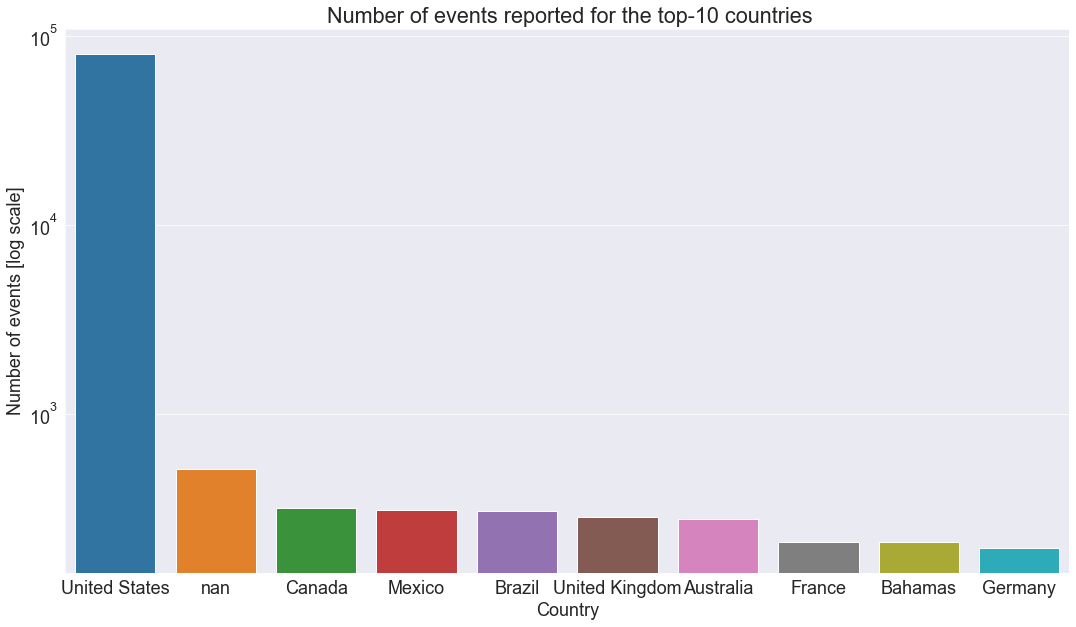

In [36]:
fig = sns.barplot(x = x.index, y = x.values);
fig.set_yscale("log")
fig.set(xlabel = 'Country', ylabel='Number of events [log scale]', title=' Number of events reported for the top-10 countries');

Most of the dataset portrays events that happend in the USA.  
Using the `LOCATION` column, we can extract the states (when the location is in the USA):

In [37]:

def get_state(text):
    return str(text)[-2:]

aviation_ds['Event.State'] = aviation_ds[aviation_ds['Country']=='United States']['LOCATION'].apply(get_state)
aviation_ds['Event.State'].unique() 

array(['WI', 'CB', 'AK', 'FL', 'WY', 'MO', 'VA', 'AZ', 'UT', 'SC', 'CA',
       'ID', 'MI', 'MA', 'LA', 'CO', 'TN', 'IA', 'WA', 'TX', 'MT', 'NC',
       'OR', 'GA', 'NV', 'AL', 'NY', 'OK', 'AR', 'NH', 'MN', 'PA', 'MS',
       'IL', 'NE', 'ME', 'SD', 'IN', 'KS', 'DE', 'NJ', 'KY', 'OH', 'ND',
       'HI', 'NM', 'MD', 'CT', 'RI', nan, 'VT', 'PR', 'O,', 'an', 'WV',
       'UN', 'GM', 'VI', 'MP', 'AO', 'PO', 'GU', 'MH', 'FN', 'DC', 'ON'],
      dtype=object)

In this section, we study the `Injury.Severity` column.

In [38]:
aviation_ds['Injury.Severity'].unique()

array(['Fatal', 'Minor', 'Non-Fatal', 'Siruose', nan, 'Unavailable',
       'Incident', 'Fatal(1)', 'Fatal(2)', 'Fatal(8)', 'Fatal(5)',
       'Fatal(3)', 'Fatal(4)', 'Fatal(9)', 'Fatal(176)', 'Fatal(7)',
       'Fatal(29)', 'Fatal(6)', 'Fatal(10)', 'Fatal(11)', 'Fatal(14)',
       'Fatal(41)', 'Fatal(157)', 'Fatal(188)', 'Fatal(112)', 'Fatal(71)',
       'Fatal(12)', 'Fatal(39)', 'Fatal(16)', 'Fatal(66)', 'Fatal(62)',
       'Fatal(23)', 'Fatal(224)', 'Fatal(150)', 'Fatal(43)', 'Fatal(162)',
       'Fatal(58)', 'Fatal(295)', 'Fatal(239)', 'Fatal(33)', 'Fatal(50)',
       'Fatal(21)', 'Fatal(19)', 'Fatal(153)', 'Fatal(127)', 'Fatal(28)',
       'Fatal(77)', 'Fatal(42)', 'Fatal(158)', 'Fatal(103)', 'Fatal(89)',
       'Fatal(90)', 'Fatal(152)', 'Fatal(228)', 'Fatal(17)', 'Fatal(13)',
       'Fatal(24)', 'Fatal(88)', 'Fatal(65)', 'Fatal(154)', 'Fatal(30)',
       'Fatal(20)', 'Fatal(40)', 'Fatal(57)', 'Fatal(199)', 'Fatal(114)',
       'Fatal(102)', 'Fatal(96)', 'Fatal(49)', 'Fatal(124)'

There's already a column detailing the number of fatal injuries, so the number between brackets is not necessary. 

In [84]:
aviation_ds['Total.Fatal.Injuries']

0        2.0
1        4.0
2        0.0
3        0.0
4        0.0
        ... 
85971    1.0
85972    2.0
85973    3.0
85974    4.0
85975    2.0
Name: Total.Fatal.Injuries, Length: 85976, dtype: float64

We can fix this by applying a function that removes the brackets and the number. We will correct `Siruose` using `Serious`. 

In [39]:
def remove_fatal(text):
    if 'Fatal(' in text:
        return 'Fatal'
    elif text == 'Siruose':
        return 'Serious'
    else:
        return text
aviation_ds['Injury.Severity'] = aviation_ds['Injury.Severity'].astype(str)
aviation_ds['Injury.Severity'] = aviation_ds['Injury.Severity'].apply(remove_fatal)
aviation_ds['Injury.Severity'] .unique()

array(['Fatal', 'Minor', 'Non-Fatal', 'Serious', 'nan', 'Unavailable',
       'Incident'], dtype=object)

Now we can drow a plot of this information :

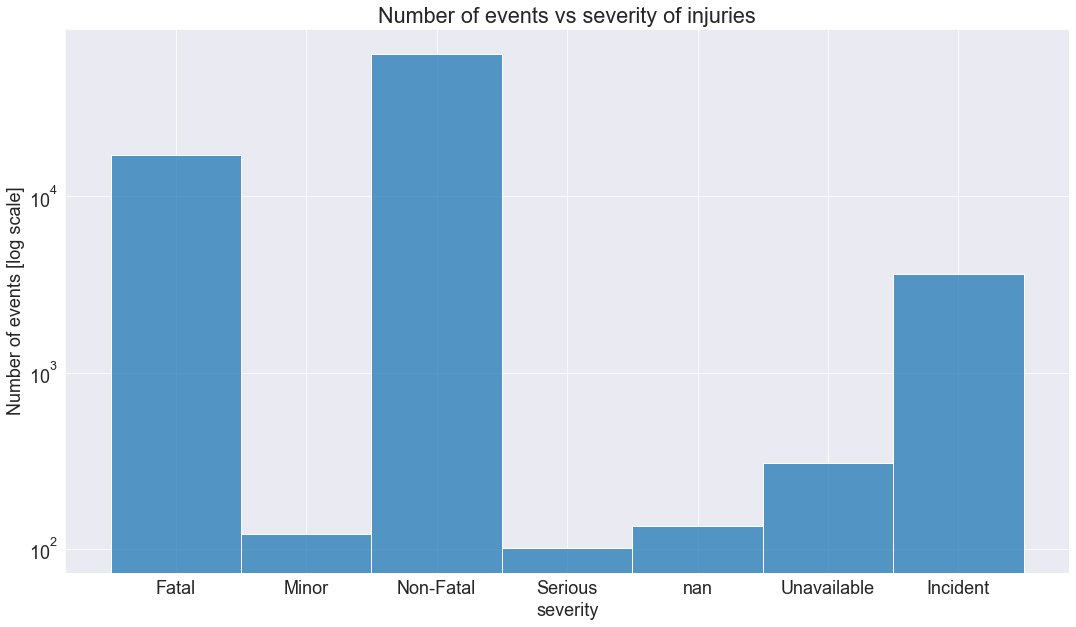

In [45]:
fig = sns.histplot(x ='Injury.Severity', data = aviation_ds );
fig.set(xlabel = 'severity', ylabel='Number of events [log scale]', title='Number of events vs severity of injuries');
fig.set_yscale("log");

Now we show the column `Aircraft.damage`

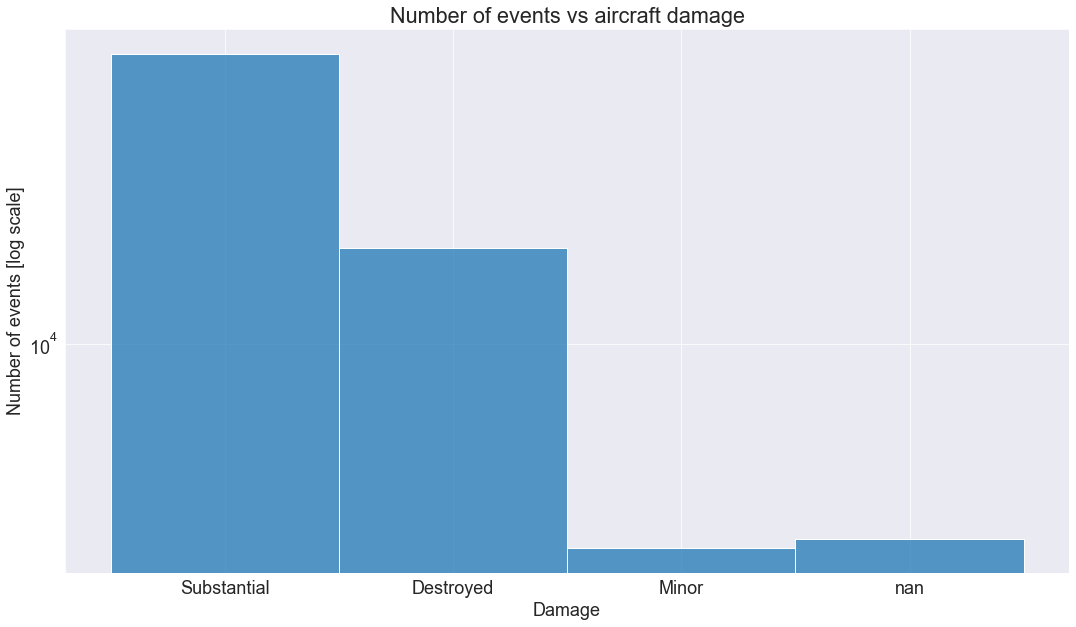

In [46]:
aviation_ds['Aircraft.damage'] =aviation_ds['Aircraft.damage'].astype(str)
fig = sns.histplot(x = 'Aircraft.damage', data = aviation_ds);
fig.set(xlabel = 'Damage', ylabel='Number of events [log scale]', title='Number of events vs aircraft damage');
fig.set_yscale("log");

Although the most common severity of injury is *non-fatal*, most of the events result in serious damages to aircraft.  
Let's see which aircraft categories are more affected by events:

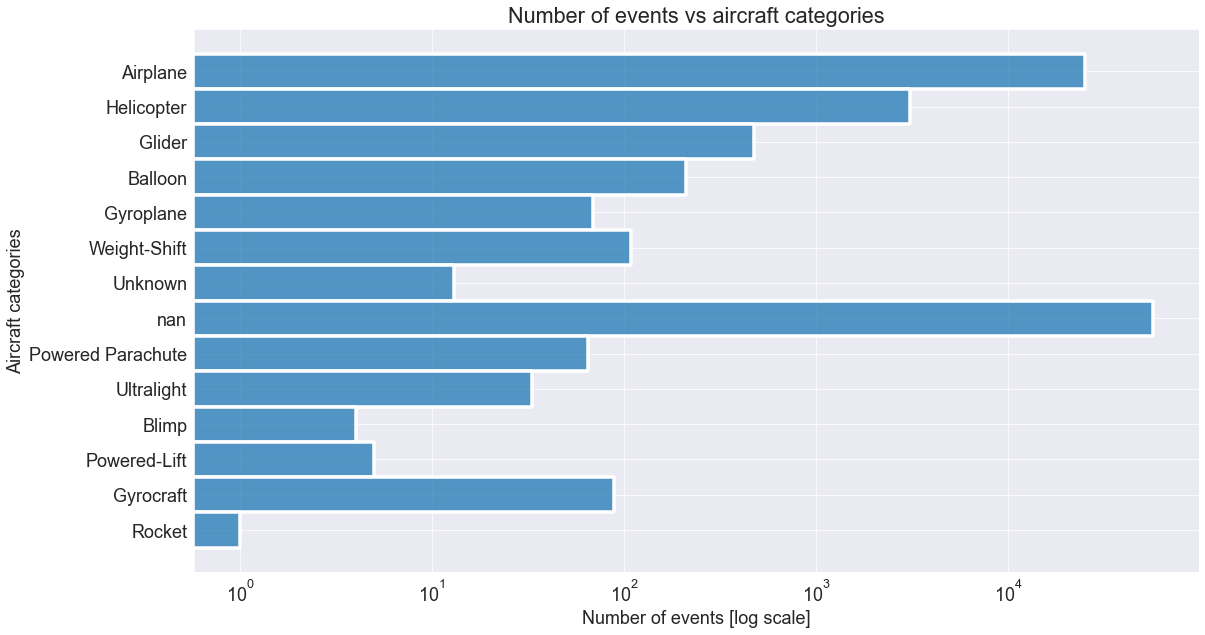

In [49]:
aviation_ds['Aircraft.Category'] = aviation_ds['Aircraft.Category'].astype(str)
fig = sns.histplot(y = 'Aircraft.Category', data = aviation_ds);
fig.set(xlabel = 'Number of events [log scale]', ylabel = 'Aircraft categories', title='Number of events vs aircraft categories');
fig.set_xscale("log");

Airplanes are more represented than other aircraft types. That being said, we observe that misrepresented events **nan**  are more numerous than all other classes. This category has a lot of missing data, and requires more cleaning. One way should be using another dataset, to determine aircraft type from make/model. We will investigate this in a future work.    
Next, we study the columns `Make` and `Model`. 

In [50]:
aviation_ds['Make'] =aviation_ds['Make'].astype(str)
aviation_ds['Model'] =aviation_ds['Model'].astype(str)


In [51]:
print(aviation_ds['Make'].unique())
print(aviation_ds['Model'].unique())


['Velocity' 'Bell' 'Maule' ... 'Rockwell Comdr' 'Bell/textron'
 'Sons Mustang']
['Vtwin' '206' 'M-6-235' ... '23-250' '305 (L-19)' 'WCS-222 (BELL 47G)']


In the column `Amateur.Built`, a special category of aircraft is shown. In general, these aircraft are used for training or tourism purposes. Let's look for more details.

In [52]:
aviation_ds['Amateur.Built'].unique()

array(['No', 'Yes', nan], dtype=object)

In [53]:
aviation_ds['Amateur.Built'] = aviation_ds['Amateur.Built'].astype(str)


Let's review the frequency of aircraft events involving amateur-built machines. 

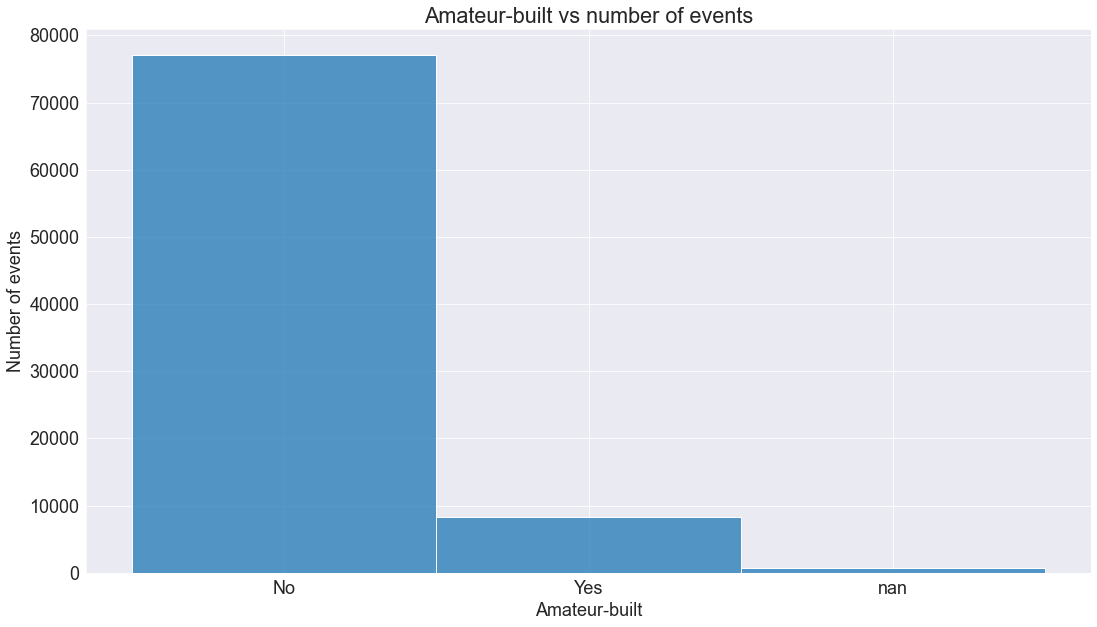

In [54]:
fig = sns.histplot(x ='Amateur.Built', data = aviation_ds, bins=[False, True]);
fig.set(xlabel = 'Amateur-built', ylabel = 'Number of events', title = 'Amateur-built vs number of events');

In [97]:
print(aviation_ds['Amateur.Built'].describe())

count     85976
unique        3
top          No
freq      77058
Name: Amateur.Built, dtype: object


77058 events out of 85296 events do not involve amateur-built aircraft. Is there a relationship between the build type and the time period of events ?

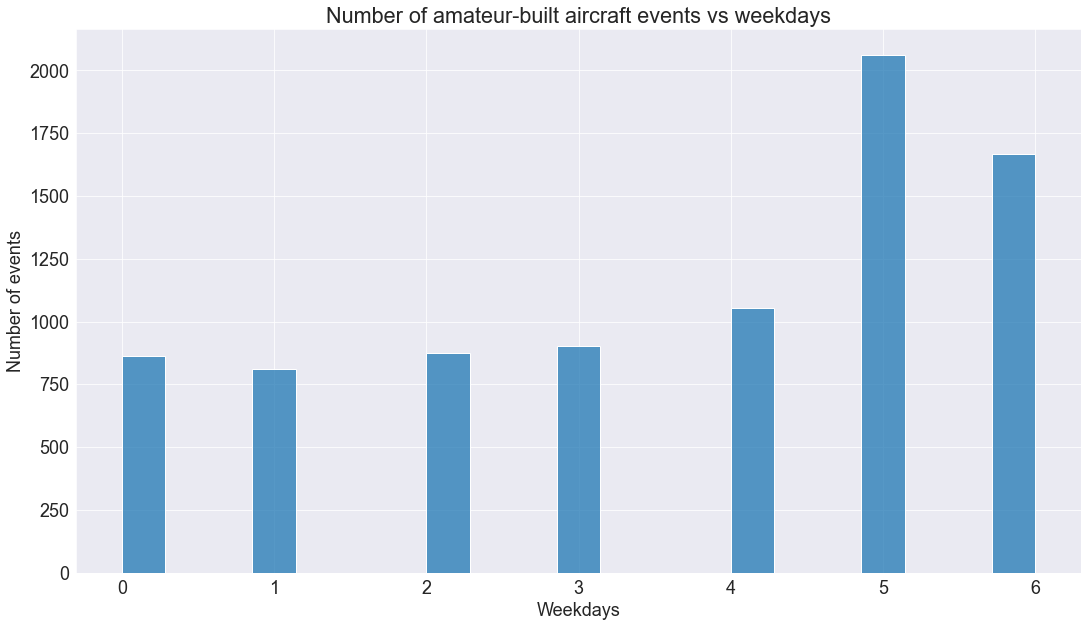

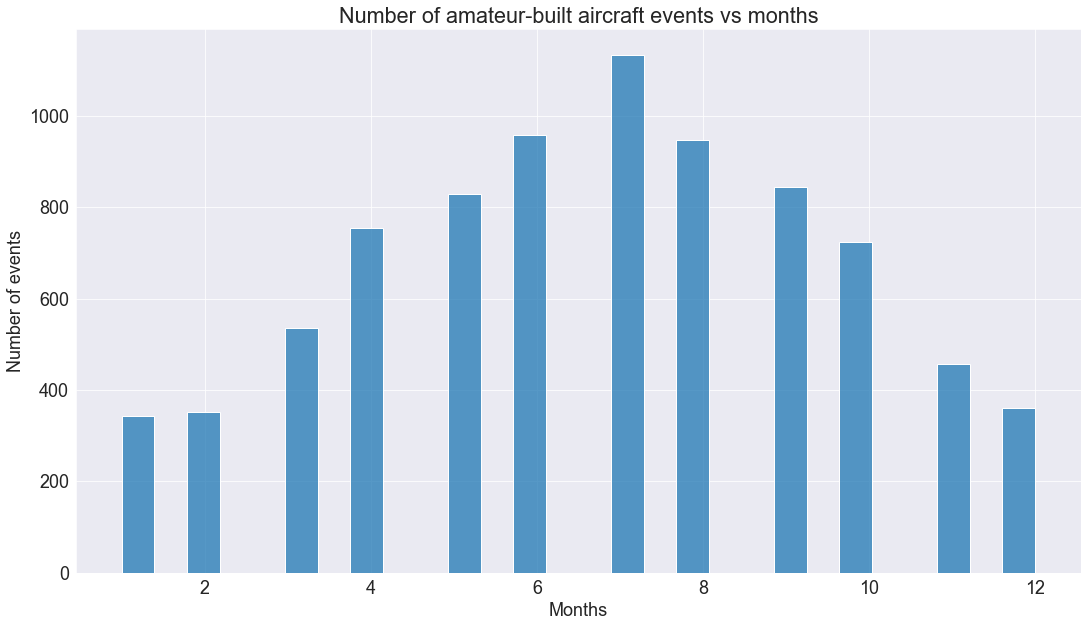

In [56]:
x = aviation_ds[aviation_ds['Amateur.Built'] == 'Yes']['Event.Weekday']
y = aviation_ds[aviation_ds['Amateur.Built'] == 'Yes']['Event.Month']
fig = sns.histplot(x =x.values);
fig.set(xlabel = 'Weekdays', ylabel = 'Number of events', title = 'Number of amateur-built aircraft events vs weekdays');
plt.figure()
fig = sns.histplot(x = y.values);
fig.set(xlabel = 'Months', ylabel = 'Number of events', title = 'Number of amateur-built aircraft events vs months');

As we expected, this category of aircraft is mainly used during weekends and summer. In the next plot, we analyse the events related to `Amateur.Built` aircraft events.

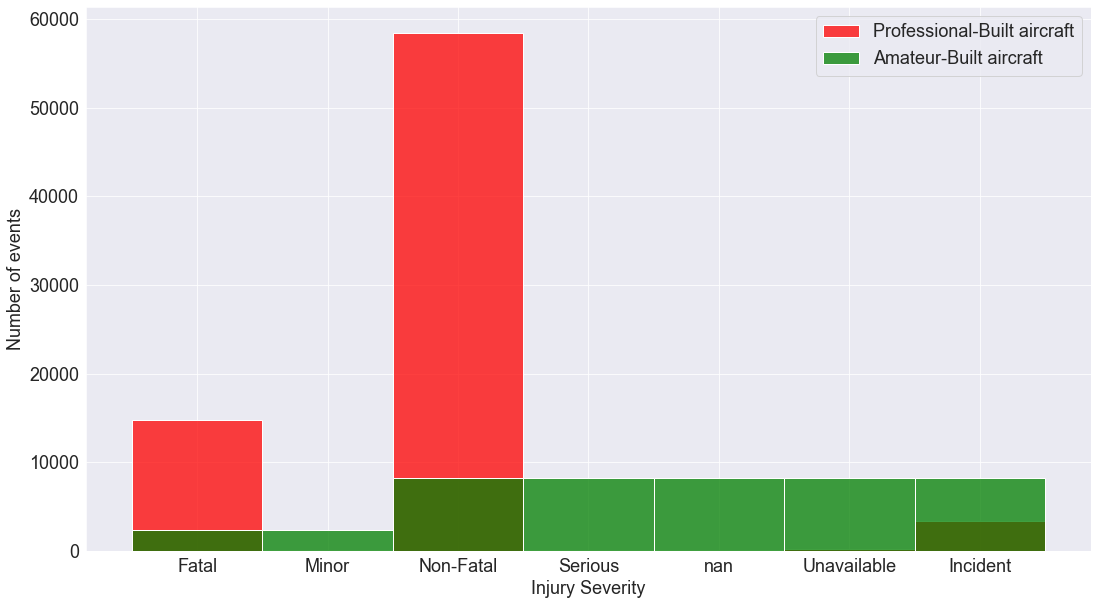

In [58]:
fig = sns.histplot(x ='Injury.Severity', data =  aviation_ds[aviation_ds['Amateur.Built'] == 'No'], color ='r', label = 'Professional-Built aircraft');
fig = sns.histplot(x ='Injury.Severity', data =  aviation_ds[aviation_ds['Amateur.Built'] == 'Yes'] , color='g', label = 'Amateur-Built aircraft',cumulative=True );
fig.set(xlabel = 'Injury Severity', ylabel = 'Number of events')
plt.legend();


`Amateur.Built` aircraft are less common. This is the reason the event count, and fatal injuries are lower. The next parameter we consider is the number of engines.

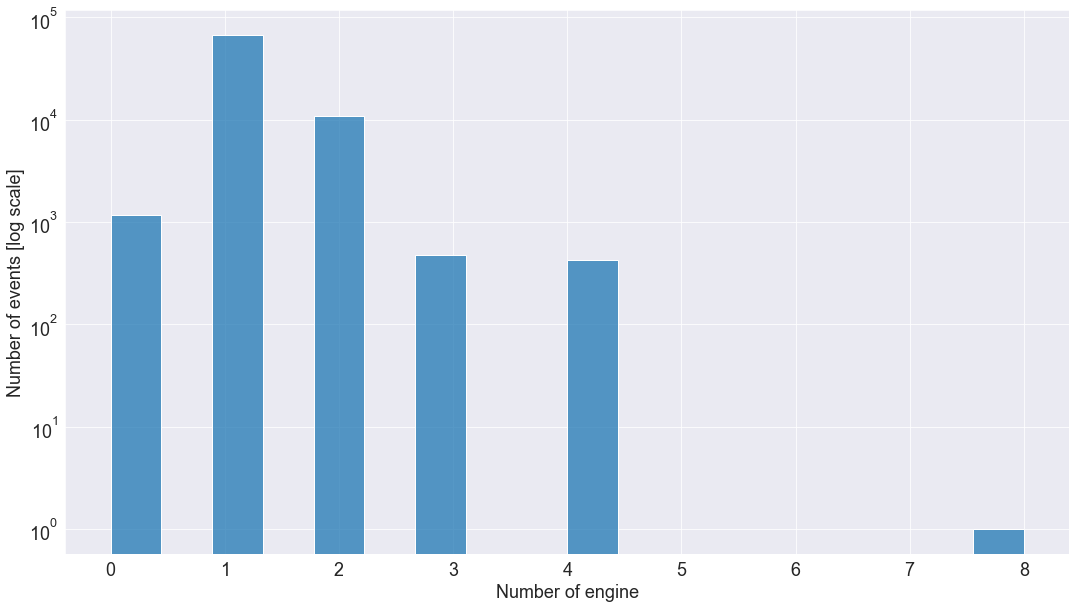

In [60]:
x = sns.histplot(x = 'Number.of.Engines', data = aviation_ds);
x.set(xlabel='Number of engine', ylabel = 'Number of events [log scale]')
x.set_yscale("log")

As we can observe, the single engine aircraft are the most affected by accidents/incidents. One possible interpretation is that most light or amateur aircraft are single-engine. The second possible reason is that -in case of an engine loss- aircraft with more than one engine could continue to fly to a safe destination, whereas single-engine aircraft must land immediatly.  
Using the column `Total.Fatal.Injuries`, we display the events with the most fatal injuries.

In [61]:
x = aviation_ds['Total.Fatal.Injuries'].sort_values(ascending = False).head(10)
print(x)

45091    349.0
45090    349.0
10358    295.0
63894    270.0
34208    265.0
72376    256.0
10999    239.0
45865    230.0
41165    229.0
19463    228.0
Name: Total.Fatal.Injuries, dtype: float64


Let's show more data about these accidents.

In [62]:
aviation_ds.iloc[x.index][['Country','Model', 'Event.Date']]

,Country,Model,Event.Date
45091,India,747-168,1996-11-12
45090,India,TU-154,1996-11-12
10358,Ukraine,777 - 206,2014-07-17
63894,United Kingdom,747-121,1988-12-21
34208,United States,A300B4-605R,2001-11-12
72376,Canada,DC-8-63,1985-12-12
10999,Malaysia,777 - 206,2014-03-08
45865,United States,747-131,1996-07-17
41165,Canada,MD-11,1998-09-02
19463,France,A330,2009-06-01


As we can expect, all these accidents were related to heavy aircraft (Boeing 747,777 ,Airbus300, MD-11 etc). The 2 first events are -in fact- one mid-air collision that happened in 1996 between a **Saudi Airline **B747 and a **Kazakhstan Airlines** Illyushin II-76 TD [read here](https://en.wikipedia.org/wiki/1996_Charkhi_Dadri_mid-air_collision).  
This lead to an observation: we can retrieve mid-air collisions by looking at the date and location of accidents.

In [63]:
date_ds = aviation_ds.groupby(['Event.Date']).count().reset_index()
dates = date_ds[date_ds['Event.Id']>1]['Event.Date']
dates

7       1982-01-01
8       1982-01-02
9       1982-01-03
10      1982-01-04
11      1982-01-05
           ...    
14100   2021-01-26
14105   2021-01-31
14106   2021-02-02
14109   2021-02-05
14111   2021-02-08
Name: Event.Date, Length: 13436, dtype: datetime64[ns]

Those are the dates with two or more events. 

In [64]:
mid_air_collisions = []
for date in tqdm(dates):
    x = aviation_ds[aviation_ds['Event.Date']==date].groupby('LOCATION').count()
    for ind, y in enumerate(x['Event.Id']):
        if y>1:
            mid_air_collisions.append((date , x.index[ind]))

  0%|          | 0/13436 [00:00<?, ?it/s]

In [65]:
mid_air_collisions[:20]

[(Timestamp('1982-01-19 00:00:00'), 'ROCKPORT, TX'),
 (Timestamp('1982-01-23 00:00:00'), 'NEWPORT RICHEY, FL'),
 (Timestamp('1982-01-23 00:00:00'), 'VICTORVILLE, CA'),
 (Timestamp('1982-02-06 00:00:00'), 'MEDFORD, OR'),
 (Timestamp('1982-02-06 00:00:00'), 'SAN JOSE, CA'),
 (Timestamp('1982-02-07 00:00:00'), 'W. OF HOMESTEAD, FL'),
 (Timestamp('1982-02-08 00:00:00'), 'NASHVILLE, TN'),
 (Timestamp('1982-03-06 00:00:00'), 'HALF MOON BAY, CA'),
 (Timestamp('1982-03-11 00:00:00'), 'NASHVILLE, TN'),
 (Timestamp('1982-03-13 00:00:00'), 'GLENDALE, AZ'),
 (Timestamp('1982-04-15 00:00:00'), 'TULARE, CA'),
 (Timestamp('1982-04-25 00:00:00'), 'NEW YORK, NY'),
 (Timestamp('1982-05-01 00:00:00'), 'CAMARILLO, CA'),
 (Timestamp('1982-05-01 00:00:00'), 'MARIETTA, GA'),
 (Timestamp('1982-05-01 00:00:00'), 'NORTH LAS VEGAS, NV'),
 (Timestamp('1982-05-12 00:00:00'), 'SANFORD, ME'),
 (Timestamp('1982-05-28 00:00:00'), 'EVANSVILLE, IN'),
 (Timestamp('1982-06-02 00:00:00'), 'SANTA CRUZ, CA'),
 (Timestamp('19

We can check events associated with these dates/locations. Note that we assume that two events happening in the same location, the same day are considered to be mid-air collisions. We couldn't confirmn that using LAT/LONG, due to the lack of this information in multiple rows.

In [76]:
nbr_collisions = len(mid_air_collisions)
nbr_events = len(aviation_ds)
print('Number of mid-air collision events is {}, out of {} events, which represents {:.2f}%.\n'.format(nbr_collisions, nbr_events, 100*nbr_collisions/nbr_events))
i = random.randint(len(mid_air_collisions))
event  = mid_air_collisions[i]
date = event[0]
location = event[1]
print('Here is a mid air collision that happened in {} on {}.'.format(location, date.date()))
df1 = aviation_ds[aviation_ds['Event.Date']==date]
result = df1[df1['LOCATION']==location].head(2) # we show only the two first events, because in some cases multiple mid-air collisions happened in one day/location
result[['Make', 'Model', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]

Number of mid-air collision events is 1241, out of 85976 events, which represents 1.44%.

Here is a mid air collision that happened in FAIRBANKS, AK on 1983-06-26.


,Make,Model,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
80782,Cessna,170,0.0,0.0,0.0,2.0
80784,"Rotec Engineering, Inc.",3A,0.0,0.0,0.0,2.0


Let's take a look at `Weather.Condition` data.

In [77]:
aviation_ds['Weather.Condition'].unique()

array(['VMC', nan, 'IMC', 'Unk', 'UNK'], dtype=object)

> **VMC** means **visual meteorological conditions**. It refers to weather conditions with visibility > 3 miles (in Canada, could be different in other countries regulations).  
> **IMC** refers to **Instrument meteorological conditions**. It refers to low visibilty conditions (< 3 Miles).

[Text(0.5, 0, 'Weather condition'),
 Text(0, 0.5, 'Number of events'),
 Text(0.5, 1.0, 'Impact of weather conditions on the number of events')]

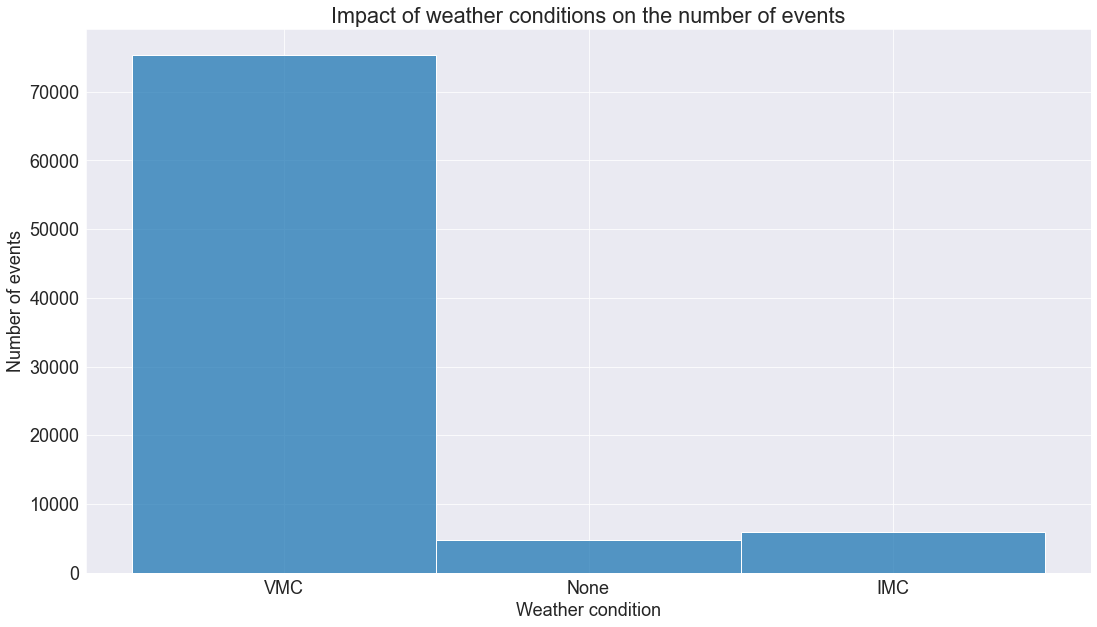

In [78]:
# some cleaning...
def weather_class(text):
    if text =='VMC' or text =='IMC':
        return text
    else:
        return None
aviation_ds['Weather.Condition'] = aviation_ds['Weather.Condition'].apply(weather_class)
aviation_ds['Weather.Condition'] = aviation_ds['Weather.Condition'].astype(str)
fig = sns.histplot(x = 'Weather.Condition', data = aviation_ds);
fig.set(xlabel = 'Weather condition', ylabel = 'Number of events', title ='Impact of weather conditions on the number of events');

We could expect that accidents  happen more often in low visibility conditions (IMC). However, the histogram shows the opposite. The reason is that most of the accidents occure (as we've seen earlier) during weekends and summer, when less experienced or amateur pilots fly. This high-traffic periods are very challenging to air traffic controllers (ATC) as well. Human factor is definitly more important in aviation events than weather !  
Let's see which phases of flight are more dangerous:

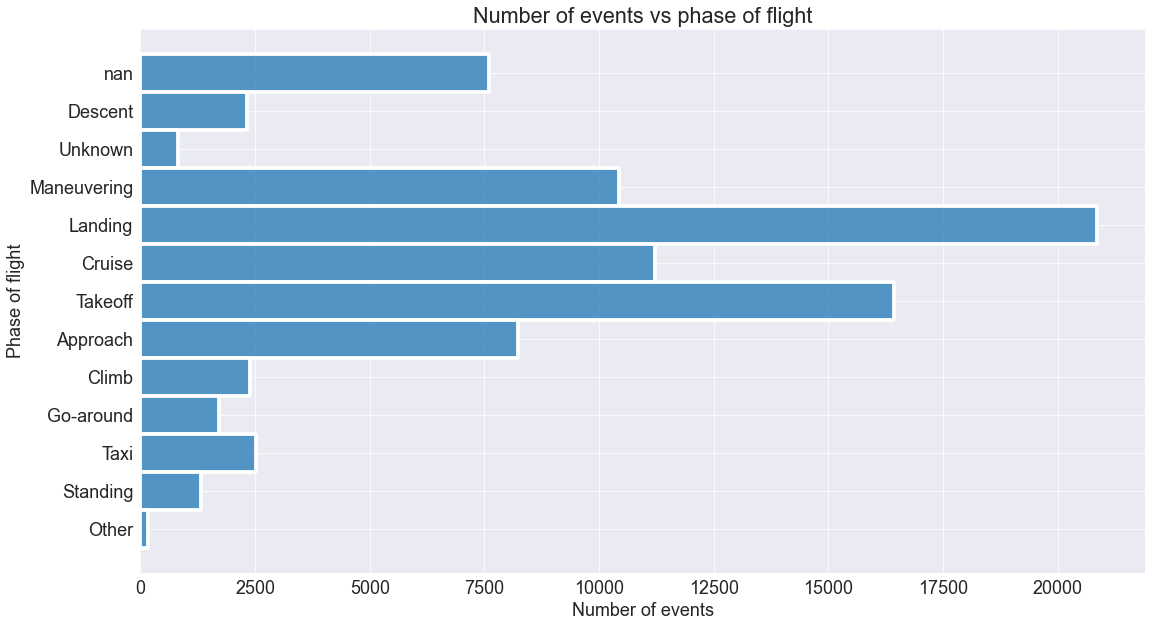

In [79]:
aviation_ds['Broad.phase.of.flight'] =  aviation_ds['Broad.phase.of.flight'].astype(str)
fig = sns.histplot(y = 'Broad.phase.of.flight', data = aviation_ds);
fig.set(xlabel = 'Number of events', ylabel = 'Phase of flight', title ='Number of events vs phase of flight');

It turns out that landing and takeoff are the phases where most events happen. These are the more complex and demanding phases. Pilot experience is a key factor during these stages. As we can see, an accident is twice as much likely to happen during landing than during cruise phase.

# Conclusions  
- This dataset contains data from 73 years. It has more than 85k records.  
- Most of the records are related to events that happened in the USA. 
- Investigations lead to categorize aviation events into two classes : **incidents** and **accidents*.
- We showed that more events happen on weekends and during summer, regardless of the build of aircraft.
- We have shown that a majority of aircraft events lead to minor injuries, whereas -in most of the cases- aircraft are heavily damaged or destroyed.
- **Amateur-Built** aircraft are very rare, but still cause a non neglectable portion of incidents.
- **Mid air collisions are rare (less than 1.5%) but are most likely to cause fatal injuries.
- Events happen in good weather conditions, more than bad conditions. 
- The most dangerous phases of flight, are landing and takeoff.

# Future work  
More data cleaning will be necessary in order to take full advantage of this dataset. It will require the use of other datasets or sources of data in order to fill the gaps.  
A web app using *stramlit* will make this data analysis more user-friendly.